<div style="box-shadow: 3px 3px 10px rgba(0, 0, 0, 0.5); border-radius: 10px; overflow: hidden;">
    <table class="MsoTableGrid" border="1" cellspacing="0" cellpadding="0" width="100%" style="border-collapse:collapse;border:none;">
        <tbody>
            <tr>
                <td style="border:solid windowtext 1.0pt;background:#4d6a8f;padding:5px;color:#e8e8e8;"><b>Project</b></td>
                <td style="border:solid windowtext 1.0pt;border-left:none;padding:5px;">Predictive Analysis for Heart Disease Risk</td>
                <td style="border:solid windowtext 1.0pt;background:#4d6a8f;padding:5px;color:#e8e8e8;"><b>Developer</b></td>
                <td style="border:solid windowtext 1.0pt;border-left:none;padding:5px;">Patrick Ryan</td>
            </tr>
            <tr>
                <td style="border:solid windowtext 1.0pt;background:#4d6a8f;padding:5px;color:#e8e8e8;"><b>Tools</b></td>
                <td style="border:solid windowtext 1.0pt;border-left:none;padding:5px;">Python 3.12</td>
                <td style="border:solid windowtext 1.0pt;background:#4d6a8f;padding:5px;color:#e8e8e8;"><b>Version</b></td>
                <td style="border:solid windowtext 1.0pt;border-left:none;padding:5px;">[pre-release] v1</td>
            </tr>
            <tr>
                <td colspan="4" style="border:solid windowtext 1.0pt;background:#4d6a8f;padding:5px;color:#e8e8e8;"><b>Description</b></td>
            </tr>
            <tr>
                <td colspan="4" style="border:solid windowtext 1.0pt;padding:5px;">The aim of this project is to develop a machine learning model that predicts the presence of heart disease in individuals based on clinical and physiological features. This model can assist in identifying individuals at risk and facilitate early intervention.</td>
            </tr>
            <tr>
                <td colspan="4" style="border:solid windowtext 1.0pt;background:#4d6a8f;padding:5px;color:#e8e8e8;"><b>Libraries and Modules</b></td>
            </tr>
            <tr>
                <td colspan="4" style="border:solid windowtext 1.0pt;padding:5px;">
                    <ul>
                        <li>Data Manipulation Libraries: pandas, numpy</li>
                        <li>Visualization Libraries: matplotlib, seaborn, IPython</li>
                        <li>Machine Learning and Data Preprocessing Libraries: sklearn, xgboost</li>
                        <li>Logging: logging</li>
                        <!-- Will add more libraries and modules here as needed -->
                    </ul>
                </td>
            </tr>
            <tr>
                <td colspan="4" style="border:solid windowtext 1.0pt;background:#4d6a8f;padding:5px;color:#e8e8e8;"><b>Functions</b></td>
            </tr>
            <tr>
                <td colspan="4" style="border:solid windowtext 1.0pt;padding:5px;">
                    <ol>
                        <li>load_data: Loads data into a DataFrame and gets a count of rows and columns.</li>
                        <li>identify_data_types: Differentiates between numerical and categorical data columns.</li>
                        <li>exploratory_data_analysis: Identifies features with missing values, correlation with the target variable, and shows descriptive statistics for numerical features.</li>
                        <li>handle_zero_values: Function to handle zero values in the dataset.</li>
                        <li>select_important_features: Selects important features for the model.</li>
                        <li>encode_and_normalize: Encodes categorical variables and normalizes numerical variables.</li>
                        <li>main: The main function that orchestrates the execution of your project.</li>
                        <!-- Will add more functions here as needed -->
                    </ol>
                </td>
            </tr>
            <tr>
                <td colspan="4" style="border:solid windowtext 1.0pt;background:#4d6a8f;padding:5px;color:#e8e8e8;"><b>Main Workflow</b></td>
            </tr>
            <tr>
                <td colspan="4" style="border:solid windowtext 1.0pt;padding:5px;">
                    <ul>
                        <li>Setup: Environment setup and library imports.</li>
                        <li>Data Loading: Using the load_data function.</li>
                        <li>EDA: Conducted by the exploratory_data_analysis function.</li>
                        <li>Data Preprocessing: Involves handling zero values, encoding, normalization, and feature selection.</li>
                        <li>Model Building: Typically involves training machine learning models.</li>
                        <li>Model Evaluation: Assessing the performance of the model.</li>
                        <!-- Will add more steps here as needed -->
                    </ul>
                </td>
            </tr>
            <!-- Can add more sections here as needed -->
        </tbody>
    </table>
</div>


In [139]:
# Basic data manipulation and numerical operations
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations

# Logging and utilities
import logging  # For logging information during execution

# Data visualization
import matplotlib.pyplot as plt  # For plotting graphs and charts
import seaborn as sns  # For making statistical graphics
from IPython.display import display, HTML # For displaying outputs in HTML

# Machine Learning – Preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier


In [140]:
def load_data(data):
    try:
        df = pd.read_csv(data)
        # Get the count of rows and columns
        rows, cols = df.shape
        # Create data frame for the count of rows and columns
        counts_df = pd.DataFrame([{'Number of Rows': rows, 'Number of Columns': cols}])
        
        # Wrap the DataFrame HTML in a div with a border and shadow for display
        counts_html = f"""
        <div style='border: 2px solid #4d6a8f; padding: 10px; margin-top: 10px; border-radius: 5px; box-shadow: 3px 3px 10px rgba(0, 0, 0, 0.5);'>
            <h3>Data Overview:</h3>
            {counts_df.to_html(index=False, na_rep='', justify='left', border=0)}
        </div>
        """
        display(HTML(counts_html))
        
    except (FileNotFoundError, pd.errors.EmptyDataError, pd.errors.ParserError) as e:
        logging.error(f"Error: {str(e)}.")
        exit(1)
    return df


In [141]:
def identify_data_types(df, unique_value_threshold=10):
    numerical_columns = []  # Initialize a list to store names of numerical columns
    categorical_columns = []  # Initialize a list to store names of categorical columns

    for column in df.columns:
        if df[column].dtype == 'object' or df[column].nunique() <= unique_value_threshold:
            # Add column to categorical list if it's of object type or has unique values below threshold
            categorical_columns.append(column)
        else:
            # Otherwise, consider it a numerical column
            numerical_columns.append(column)

    # Create a DataFrame for displaying information
    max_len = max(len(numerical_columns), len(categorical_columns))
    # Create a balanced list for display
    display_numerical = numerical_columns + [None] * (max_len - len(numerical_columns))
    display_categorical = categorical_columns + [None] * (max_len - len(categorical_columns))

    comparison_df = pd.DataFrame({'Numerical Columns': display_numerical, 'Categorical Columns': display_categorical})

    # Wrap the DataFrame HTML in a div with a border for display
    comparison_html = f"""
    <div style='border: 2px solid #4d6a8f; padding: 10px; margin-top: 10px; border-radius: 5px; box-shadow: 3px 3px 10px rgba(0, 0, 0, 0.5);'>
        <h3>Data Type Identification:</h3>
        {comparison_df.to_html(index=False, na_rep='', justify='left', border=0)}
    </div>
    """
    display(HTML(comparison_html))

    # Return the original lists without None values for further analysis
    return numerical_columns, categorical_columns



In [142]:
def exploratory_data_analysis(dataframe, numerical_columns, categorical_columns, target_column='HeartDisease'):
    # Feature Correlation Analysis
    correlation = dataframe[numerical_columns].corrwith(dataframe[target_column]).abs()
    correlation_html = f"""
    <div style='border: 2px solid #4d6a8f; padding: 10px; margin-top: 10px; border-radius: 5px; box-shadow: 3px 3px 10px rgba(0, 0, 0, 0.5);'>
        <h3>Feature Correlation with {target_column}:</h3>
        {correlation.sort_values(ascending=False).to_frame('Correlation').to_html()}
    </div>
    """
    display(HTML(correlation_html))
    
    # Descriptive Statistics
    descriptive_stats_html = f"""
    <div style='border: 2px solid #4d6a8f; padding: 10px; margin-top: 10px; border-radius: 5px; box-shadow: 3px 3px 10px rgba(0, 0, 0, 0.5);'>
        <h3>Descriptive Statistics for Numerical Columns:</h3>
        {dataframe[numerical_columns].describe().to_html()}
    </div>
    """
    display(HTML(descriptive_stats_html))

    # Missing Values Analysis
    all_columns = numerical_columns + categorical_columns + [target_column]
    missing_values = dataframe[all_columns].isna().sum()
    missing_percentage = (missing_values / len(dataframe)) * 100
    missing_df = pd.DataFrame({'Number of Missing Values': missing_values, 'Percentage': missing_percentage})
    missing_values_html = f"""
    <div style='border: 2px solid #4d6a8f; padding: 10px; margin-top: 10px; border-radius: 5px; box-shadow: 3px 3px 10px rgba(0, 0, 0, 0.5);'>
        <h3>Missing Values Analysis:</h3>
        {missing_df.to_html()}
    </div>
    """
    display(HTML(missing_values_html))

    # Zero Values Analysis for Numerical Features
    zero_values_counts = (dataframe[numerical_columns] == 0).sum()
    zero_values_percentage = (zero_values_counts / len(dataframe)) * 100
    zero_values_df = pd.DataFrame({'Number of Zero Values': zero_values_counts, 'Percentage of Zero Values': zero_values_percentage})
    zero_values_html = f"""
    <div style='border: 2px solid #4d6a8f; padding: 10px; margin-top: 10px; border-radius: 5px; box-shadow: 3px 3px 10px rgba(0, 0, 0, 0.5);'>
        <h3>Zero Values Analysis for Numerical Features:</h3>
        {zero_values_df.to_html()}
    </div>
    """
    display(HTML(zero_values_html))

     # Identify columns that need imputation (non-zero count of zero values, excluding the specified column)
    columns_to_impute = zero_values_df.index[zero_values_df['Number of Zero Values'] > 0].tolist()

    # Set up the matplotlib figure for numerical features (distributions and box plots)
    n_cols = 2  # Number of columns in the grid
    n_rows = (len(numerical_columns) + len(numerical_columns) % n_cols) // n_cols
    plt.figure(figsize=(15, n_rows * 4))

    for i, column in enumerate(numerical_columns, 1):
        # Histogram for distribution
        plt.subplot(n_rows, n_cols * 2, (i - 1) * 2 + 1)
        sns.histplot(dataframe[column], kde=True)
        plt.title(f'Distribution of {column}')

        # Box plot for outliers
        plt.subplot(n_rows, n_cols * 2, (i - 1) * 2 + 2)
        sns.boxplot(x=dataframe[column])
        plt.title(f'Box Plot of {column}')

    plt.tight_layout()
    plt.show()

    # Set up the matplotlib figure for categorical features (value counts and target association)
    plt.figure(figsize=(15, len(categorical_columns) * 4))

    for i, column in enumerate(categorical_columns, 1):
        # Value counts for each categorical feature
        plt.subplot(len(categorical_columns), 2, (i - 1) * 2 + 1)
        sns.countplot(y=dataframe[column], order=dataframe[column].value_counts().index)
        plt.title(f'Distribution of {column}')

        # Association with target
        plt.subplot(len(categorical_columns), 2, (i - 1) * 2 + 2)
        sns.countplot(x=column, hue=target_column, data=dataframe)
        plt.title(f'{column} vs {target_column}')

    plt.tight_layout()
    plt.show()

    # Return the DataFrame of zero values for further analysis or processing
    return columns_to_impute

In [143]:
def handle_zero_values(dataframe, columns_to_impute, exclude_column='Oldpeak', strategy='mean'):
    # Create a copy of the dataframe to avoid modifying the original data
    imputed_dataframe = dataframe.copy()

    # Dictionary to hold the count of zero values imputed for each column
    imputation_counts = {}

    # Loop through each column and replace zero values with NaN, excluding the specified column
    for column in columns_to_impute:
        if column != exclude_column:
            zero_count = (imputed_dataframe[column] == 0).sum()
            imputed_dataframe[column] = imputed_dataframe[column].replace(0, np.nan)
            nan_count_after = imputed_dataframe[column].isna().sum()
            imputation_counts[column] = zero_count if zero_count == nan_count_after else 0

    # Initialize the imputer with the specified strategy
    imputer = SimpleImputer(missing_values=np.nan, strategy=strategy)

    # Impute the missing values in the specified columns
    imputed_dataframe[columns_to_impute] = imputer.fit_transform(imputed_dataframe[columns_to_impute])

    # Create a DataFrame from the imputation counts dictionary
    imputation_counts_df = pd.DataFrame(list(imputation_counts.items()), columns=['Column', 'Zero Values Imputed'])

    # Combined HTML content with border
    combined_html = f"""
    <div style='border: 2px solid #4d6a8f; padding: 10px; margin-top: 10px; border-radius: 5px; box-shadow: 3px 3px 10px rgba(0, 0, 0, 0.5);'>
        <h4>Imputation Summary:</h4>
        {imputation_counts_df.to_html(index=False)}
        <div style='margin-top: 20px;'>
            <h4>Note:</h4>
            <p>In this processing step, zero values in clinical numerical features were treated as missing data
            and subsequently imputed. This approach stems from clinical considerations; for instance, metrics
            like resting blood pressure and cholesterol are not clinically plausible to be zero. Therefore, such
            values were regarded as missing.</p>
            <p>An exception was made for the 'Oldpeak' feature, where a zero value is clinically meaningful
            and thus was not subject to imputation. This nuanced handling ensures that the data more accurately
            reflects clinical realities.</p>
        </div>
    </div>
    """
    display(HTML(combined_html))

    return imputed_dataframe

In [144]:
def encode_and_normalize(dataframe, categorical_columns, numerical_columns):

    # Encode categorical features using one-hot encoding
    encoded_df = pd.get_dummies(dataframe, columns=categorical_columns, drop_first=True)

    # Initialize the MinMaxScaler
    scaler = MinMaxScaler()

    # Normalize numerical features
    encoded_df[numerical_columns] = scaler.fit_transform(encoded_df[numerical_columns])

    # Summary information
    original_features_count = len(categorical_columns) + len(numerical_columns)
    encoded_features_count = len(encoded_df.columns)
    added_features_count = encoded_features_count - original_features_count

    # Combined HTML content with scrollable div for the table
    combined_html = f"""
    <div style='border: 2px solid #4d6a8f; padding: 10px; margin-top: 10px; border-radius: 5px; box-shadow: 3px 3px 10px rgba(0, 0, 0, 0.5); overflow: hidden;'>
        <h4>Post-Encoding and Normalization Summary:</h4>
        <ul>
            <li>Original Number of Features: {original_features_count}</li>
            <li>Number of Features After Encoding: {encoded_features_count}</li>
            <li>Number of Added Features Due to Encoding: {added_features_count}</li>
        </ul>
        <h4>Sample of Processed Data:</h4>
        <div style='overflow-x: auto;'>
            {encoded_df.head().to_html()}
        </div>
       
    </div>
    """
    display(HTML(combined_html))

    return encoded_df

In [145]:
def select_important_features(encoded_df, target_column="HeartDisease_1", n_features=None):
    # Separate features and target
    X = encoded_df.drop(columns=[target_column])
    y = encoded_df[target_column]

    # Initialize and fit the model
    model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
    model.fit(X, y)

    # Get feature importances
    feature_importances = model.feature_importances_

    # Create a DataFrame of features and their importance scores
    importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
    
    # Sort the DataFrame by importance
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    # If n_features is specified, select the top n features
    if n_features is not None and n_features < len(importance_df):
        selected_features_df = importance_df.head(n_features)
        dropped_features_df = importance_df.tail(len(importance_df) - n_features)
    else:
        selected_features_df = importance_df
        dropped_features_df = pd.DataFrame(columns=['Feature', 'Importance'])

    # Display the selected features and their importance
    selected_html = f"""
    <div style='border: 2px solid #4d6a8f; padding: 10px; margin-top: 10px; border-radius: 5px; box-shadow: 3px 3px 10px rgba(0, 0, 0, 0.5);'>
        <h3>Selected Features and Their Importance (XGBoost):</h3>
        {selected_features_df.to_html(index=False)}
    </div>
    """
    display(HTML(selected_html))

    # Display the dropped features, if any
    if not dropped_features_df.empty:
        dropped_html = f"""
        <div style='border: 2px solid #4d6a8f; padding: 10px; margin-top: 10px; border-radius: 5px; box-shadow: 3px 3px 10px rgba(0, 0, 0, 0.5);'>
            <h3>Dropped Features and Their Importance (XGBoost):</h3>
            {dropped_features_df.to_html(index=False)}
        </div>
        """
        display(HTML(dropped_html))

    # Return the DataFrame with selected features and the target column
    selected_features_list = selected_features_df['Feature'].tolist()
    reduced_df = encoded_df[selected_features_list + [target_column]]
    return reduced_df

In [146]:
def split_data(df, target_column, test_size=0.2, random_state=42):
    X = df.drop(target_column, axis=1)
    y = df[target_column]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    # Display split information
    train_size = len(X_train)
    test_size = len(X_test)
    total_size = len(df)
    train_percentage = (train_size / total_size) * 100
    test_percentage = (test_size / total_size) * 100
    
    split_info_html = f"""
    <div style='border: 2px solid #4d6a8f; padding: 10px; margin-top: 10px; border-radius: 5px; box-shadow: 3px 3px 10px rgba(0, 0, 0, 0.5);'>
        <h3>Data Split Information:</h3>
        <table>
            <tr><th>Dataset</th><th>Count</th><th>Percentage</th></tr>
            <tr><td>Training Set</td><td>{train_size}</td><td>{train_percentage:.2f}%</td></tr>
            <tr><td>Testing Set</td><td>{test_size}</td><td>{test_percentage:.2f}%</td></tr>
        </table>
    </div>
    """
    display(HTML(split_info_html))

    return X_train, X_test, y_train, y_test

In [147]:
def train_logistic_regression(X_train, y_train):
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
    return model


In [148]:
def train_random_forest(X_train, y_train):
    model = RandomForestClassifier(n_estimators=100)
    model.fit(X_train, y_train)
    return model

In [149]:
def train_xgboost(X_train, y_train):
    model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
    model.fit(X_train, y_train)
    return model


In [150]:
def evaluate_models(X_test, y_test, models):
    model_performance = []
    best_f1 = 0
    best_model_index = -1
    
    for i, model in enumerate(models):
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
        
        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_pred_proba)
        recall = recall_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        
        model_performance.append((type(model).__name__, accuracy, roc_auc, recall, precision, f1))
        
        # Select the best model based on F1 score
        if f1 > best_f1:
            best_f1 = f1
            best_model_index = i
    
    # Display the evaluation results
    table_rows = ''
    for i, (model_name, accuracy, roc_auc, recall, precision, f1) in enumerate(model_performance):
        best_model_mark = '*' if i == best_model_index else ''
        table_rows += f"<tr><td>{model_name}</td><td>{accuracy:.4f}</td><td>{roc_auc:.4f}</td><td>{recall:.4f}</td><td>{precision:.4f}</td><td>{f1:.4f}</td><td>{best_model_mark}</td></tr>"
    
    table_html = f"""
    <div style='border: 2px solid #4d6a8f; padding: 10px; margin-top: 10px; border-radius: 5px; box-shadow: 3px 3px 10px rgba(0, 0, 0, 0.5);'>
        <h3>Model Evaluation Results:</h3>
        <table>
            <tr><th>Model</th><th>Accuracy</th><th>ROC AUC</th><th>Recall</th><th>Precision</th><th>F1 Score</th><th>Best Model</th></tr>
            {table_rows}
        </table>
    </div>
    """
    display(HTML(table_html))
    
    return models[best_model_index], best_f1 if best_model_index >= 0 else None

In [151]:
def main():
    # Loading the dataset
    display(HTML("""
    <div style="padding:5px; margin:10px; text-align: center; background-color: #4d6a8f; color: #e8e8e8; box-shadow: 3px 3px 10px rgba(0, 0, 0, 0.5); border-radius: 10px;">
        <h1>Loading the dataset</h1>
    </div>
    """))
    df = load_data("heart.csv")

    # Identifying data types
    display(HTML("""
    <div style="padding:5px; margin:10px; text-align: center; background-color: #4d6a8f; color: #e8e8e8; box-shadow: 3px 3px 10px rgba(0, 0, 0, 0.5); border-radius: 10px;">
        <h1>Identifying data types</h1>
    </div>
    """))
    numerical_cols, categorical_cols = identify_data_types(df)
    
    # Performing EDA
    display(HTML("""
    <div style="padding:5px; margin:10px; text-align: center; background-color: #4d6a8f; color: #e8e8e8; box-shadow: 3px 3px 10px rgba(0, 0, 0, 0.5); border-radius: 10px;">
        <h1>Performing EDA</h1>
    </div>
    """))
    columns_to_impute = exploratory_data_analysis(df, numerical_cols, categorical_cols)

    # Handling missing values
    display(HTML("""
    <div style="padding:5px; margin:10px; text-align: center; background-color: #4d6a8f; color: #e8e8e8; box-shadow: 3px 3px 10px rgba(0, 0, 0, 0.5); border-radius: 10px;">
        <h1>Handling missing values</h1>
    </div>
    """))    
    imputed_df = handle_zero_values(df, columns_to_impute)

    # Performing Encoding and Normalization
    display(HTML("""
    <div style="padding:5px; margin:10px; text-align: center; background-color: #4d6a8f; color: #e8e8e8; box-shadow: 3px 3px 10px rgba(0, 0, 0, 0.5); border-radius: 10px;">
        <h1>Performing Encoding and Normalization</h1>
    </div>
    """))    
    encoded_df = encode_and_normalize(imputed_df, categorical_cols, numerical_cols)

    # Performing Feature Selection
    display(HTML("""
    <div style="padding:5px; margin:10px; text-align: center; background-color: #4d6a8f; color: #e8e8e8; box-shadow: 3px 3px 10px rgba(0, 0, 0, 0.5); border-radius: 10px;">
        <h1>Performing Feature Selection</h1>
    </div>
    """))    
    reduced_df = select_important_features(encoded_df)

    # Splitting the data
    display(HTML("""
    <div style="padding:5px; margin:10px; text-align: center; background-color: #4d6a8f; color: #e8e8e8; box-shadow: 3px 3px 10px rgba(0, 0, 0, 0.5); border-radius: 10px;">
        <h1>Splitting the Data</h1>
    </div>
    """))
    X_train, X_test, y_train, y_test = split_data(reduced_df, 'HeartDisease_1')  # Replace 'HeartDisease' with your actual target column name if different

    # Training and Evaluating Models
    display(HTML("""
    <div style="padding:5px; margin:10px; text-align: center; background-color: #4d6a8f; color: #e8e8e8; box-shadow: 3px 3px 10px rgba(0, 0, 0, 0.5); border-radius: 10px;">
        <h1>Training and Evaluating Models</h1>
    </div>
    """))
    lr_model = train_logistic_regression(X_train, y_train)
    rf_model = train_random_forest(X_train, y_train)
    xgb_model = train_xgboost(X_train, y_train)
    best_model, best_score = evaluate_models(X_test, y_test, [lr_model, rf_model, xgb_model])


Number of Rows,Number of Columns
918,12


Numerical Columns,Categorical Columns
Age,Sex
RestingBP,ChestPainType
Cholesterol,FastingBS
MaxHR,RestingECG
Oldpeak,ExerciseAngina
None,ST_Slope
None,HeartDisease


,Correlation
Oldpeak,0.403951
MaxHR,0.400421
Age,0.282039
Cholesterol,0.232741
RestingBP,0.107589


,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
count,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,136.809368,0.887364
std,9.432617,18.514154,109.384145,25.460334,1.066570
min,28.000000,0.000000,0.000000,60.000000,-2.600000
25%,47.000000,120.000000,173.250000,120.000000,0.000000
50%,54.000000,130.000000,223.000000,138.000000,0.600000
75%,60.000000,140.000000,267.000000,156.000000,1.500000
max,77.000000,200.000000,603.000000,202.000000,6.200000


,Number of Missing Values,Percentage
Age,0,0.0
RestingBP,0,0.0
Cholesterol,0,0.0
MaxHR,0,0.0
Oldpeak,0,0.0
Sex,0,0.0
ChestPainType,0,0.0
FastingBS,0,0.0
RestingECG,0,0.0
ExerciseAngina,0,0.0


,Number of Zero Values,Percentage of Zero Values
Age,0,0.000000
RestingBP,1,0.108932
Cholesterol,172,18.736383
MaxHR,0,0.000000
Oldpeak,368,40.087146


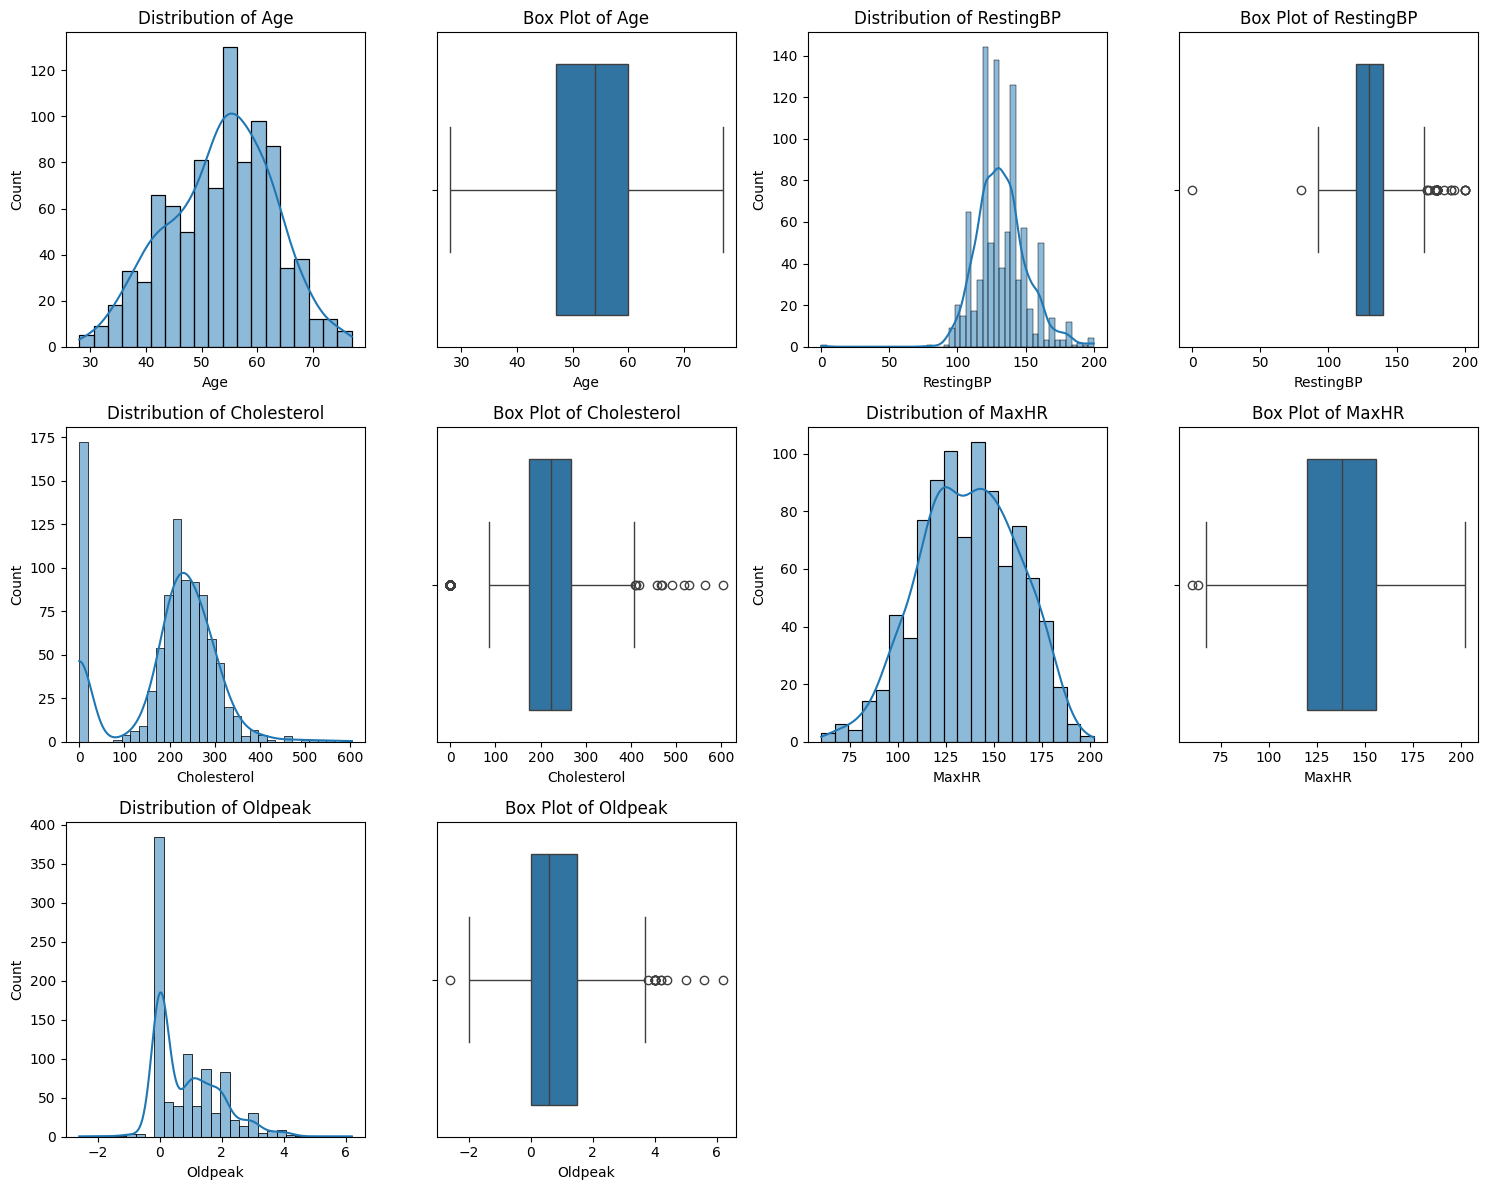

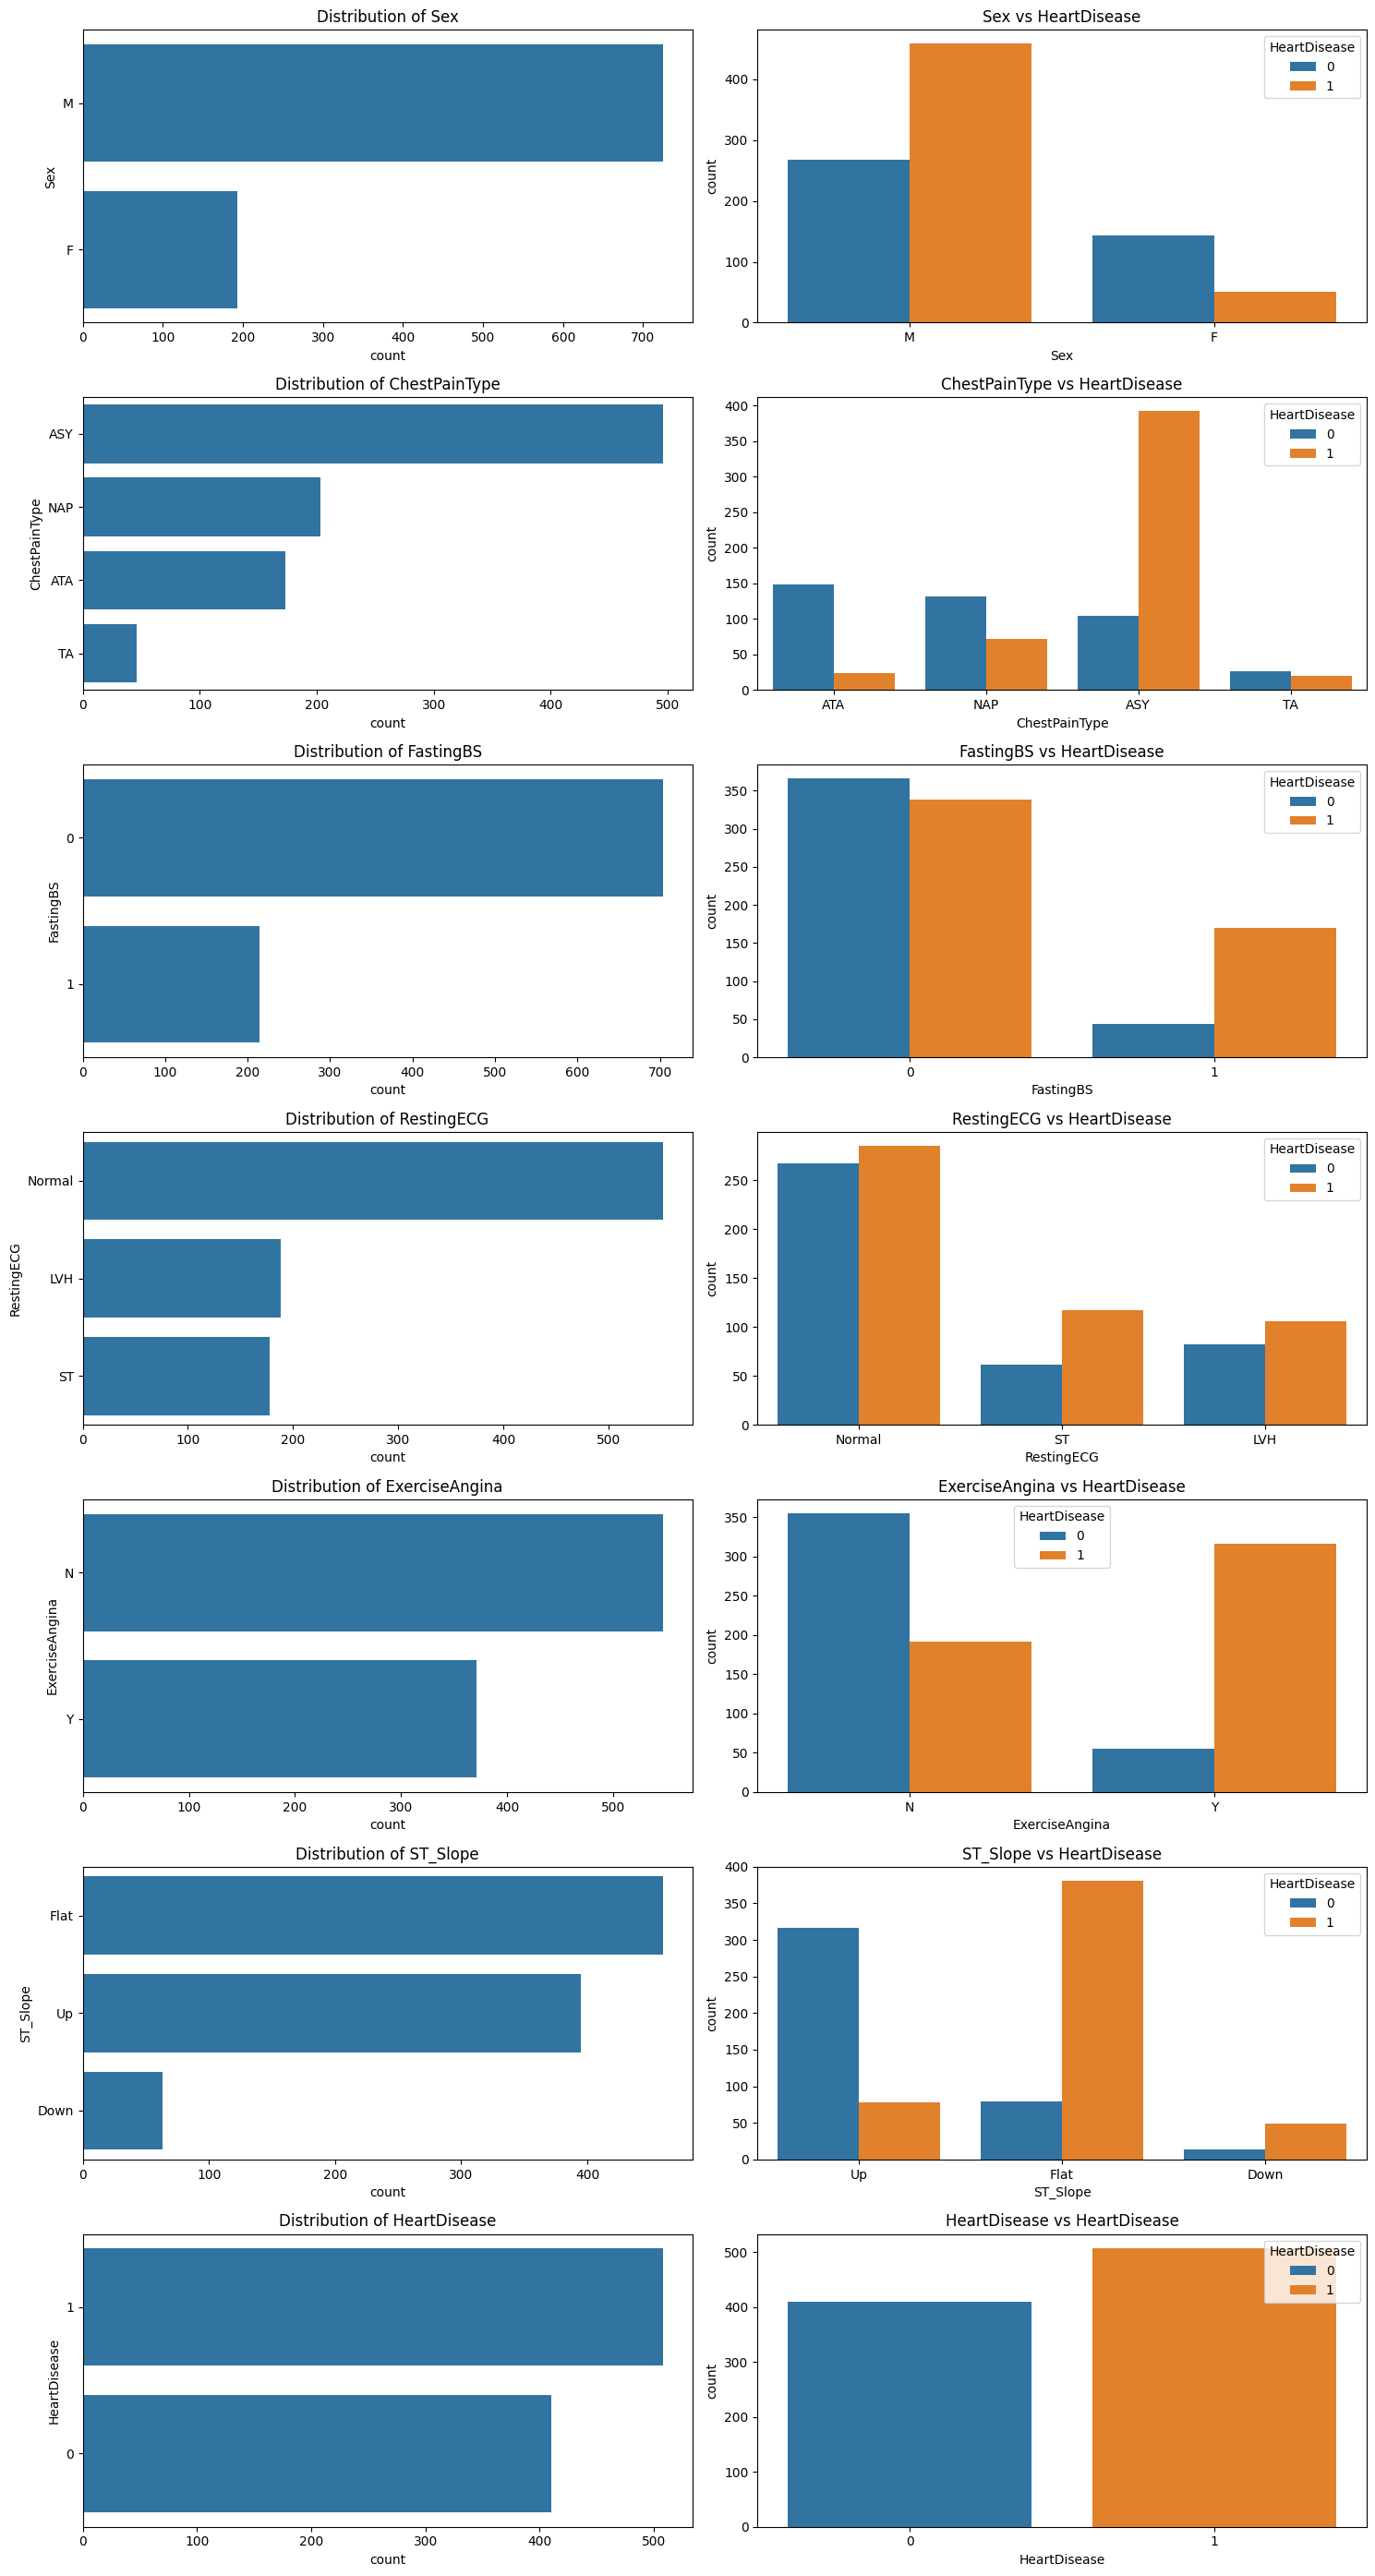

Column,Zero Values Imputed
RestingBP,1
Cholesterol,172


,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,FastingBS_1,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up,HeartDisease_1
0,0.244898,0.500000,0.393822,0.788732,0.295455,True,True,False,False,False,True,False,False,False,True,False
1,0.428571,0.666667,0.183398,0.676056,0.409091,False,False,True,False,False,True,False,False,True,False,True
2,0.183673,0.416667,0.382239,0.267606,0.295455,True,True,False,False,False,False,True,False,False,True,False
3,0.408163,0.483333,0.249035,0.338028,0.465909,False,False,False,False,False,True,False,True,True,False,True
4,0.530612,0.583333,0.212355,0.436620,0.295455,True,False,True,False,False,True,False,False,False,True,False


Feature,Importance
ST_Slope_Up,0.711388
Sex_M,0.041175
FastingBS_1,0.036061
ChestPainType_ATA,0.033861
ChestPainType_NAP,0.031491
ExerciseAngina_Y,0.030844
Oldpeak,0.019224
MaxHR,0.014999
ChestPainType_TA,0.012988
ST_Slope_Flat,0.012631


Dataset,Count,Percentage
Training Set,734,79.96%
Testing Set,184,20.04%


Model,Accuracy,ROC AUC,Recall,Precision,F1 Score,Best Model
LogisticRegression,0.8587,0.9283,0.8505,0.9010,0.8750,
RandomForestClassifier,0.8641,0.9277,0.8785,0.8868,0.8826,*
XGBClassifier,0.8370,0.9097,0.8505,0.8667,0.8585,


In [152]:
if __name__ == "__main__":
    main()